In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Existing dataset
data = np.array([
    [25, 'Bachelor', 'Java', 'A'],
    [30, 'Master', 'Python', 'B'],
    [22, 'Bachelor', 'C++', 'C'],
    [28, 'PhD', 'Python', 'A'],
    [35, 'Master', 'Java', 'B'],
    [26, 'Bachelor', 'Java', 'A'],
    [31, 'Master', 'Python', 'B'],
    [23, 'Bachelor', 'C++', 'C'],
    [27, 'PhD', 'Python', 'A'],
    [36, 'Master', 'Java', 'B'],
    [29, 'Bachelor', 'Java', 'A']
])

# Additional diverse answers
additional_data = np.array([
    [24, 'Bachelor', 'C++', 'D'],
    [32, 'Master', 'Python', 'E'],
    [21, 'Bachelor', 'Java', 'F'],
    [33, 'PhD', 'C++', 'G'],
    [34, 'Master', 'Python', 'H'],
    [31, 'Bachelor', 'Java', 'I'],
    [28, 'Master', 'C++', 'J'],
    [29, 'PhD', 'Python', 'K'],
    [27, 'Bachelor', 'Java', 'L'],
    [35, 'Master', 'Python', 'M']
])

# Repeat the existing and additional data to create a larger dataset with diverse answers
repetitions = 50
larger_data = np.concatenate((np.tile(data, (repetitions, 1)), np.tile(additional_data, (repetitions, 1))), axis=0)
print(larger_data)

[['25' 'Bachelor' 'Java' 'A']
 ['30' 'Master' 'Python' 'B']
 ['22' 'Bachelor' 'C++' 'C']
 ...
 ['29' 'PhD' 'Python' 'K']
 ['27' 'Bachelor' 'Java' 'L']
 ['35' 'Master' 'Python' 'M']]


In [9]:
# Convert to DataFrame
column_names = ['age', 'education', 'skill', 'placement']
df = pd.DataFrame(larger_data, columns=column_names)
print(df)
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

     age education   skill placement
0     25  Bachelor    Java         A
1     30    Master  Python         B
2     22  Bachelor     C++         C
3     28       PhD  Python         A
4     35    Master    Java         B
...   ..       ...     ...       ...
1045  31  Bachelor    Java         I
1046  28    Master     C++         J
1047  29       PhD  Python         K
1048  27  Bachelor    Java         L
1049  35    Master  Python         M

[1050 rows x 4 columns]


In [10]:
# Split features and target variable
X = df.drop('placement', axis=1)
y = df['placement']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

Accuracy: 1.0
Confusion Matrix:
 [[56  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 14]]


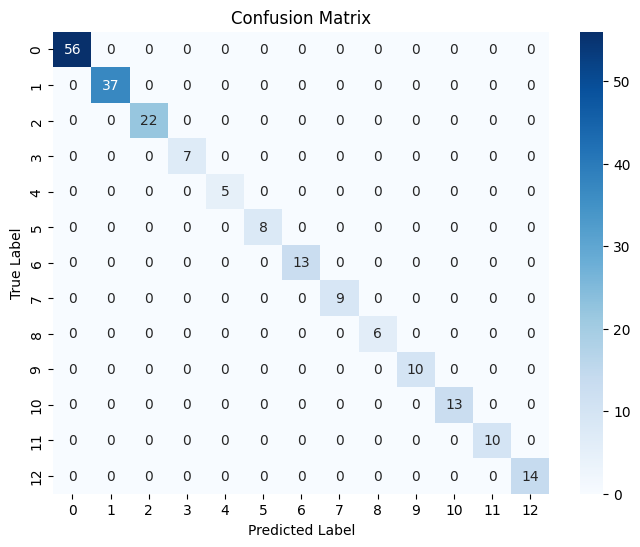

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

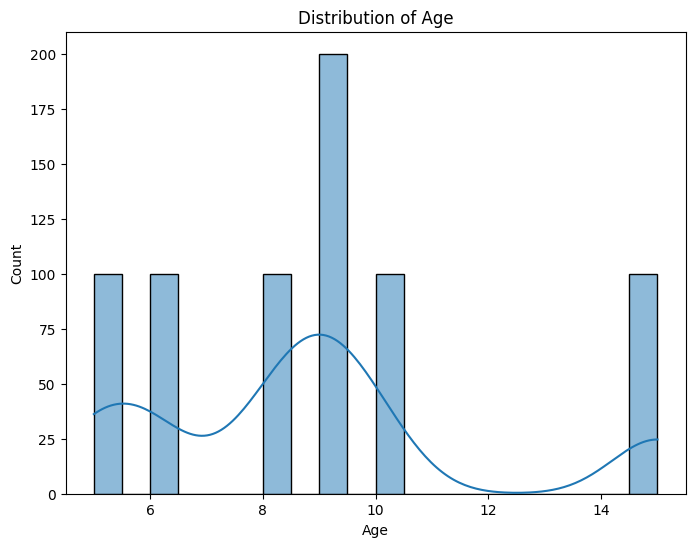

In [35]:
# 1. Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df_constrained['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

C:\Users\Aadil Rayeen\AppData\Local\Temp\ipykernel_19152\2677949269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=df_constrained, palette='Set2')


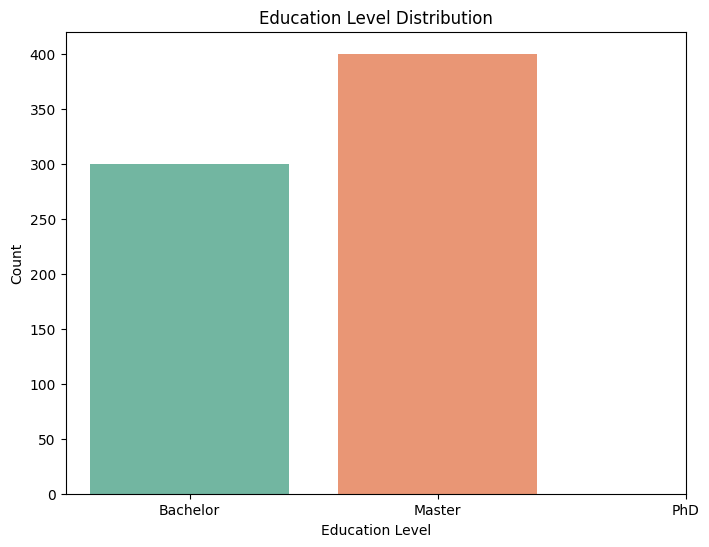

In [36]:
# 2. Education Level Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=df_constrained, palette='Set2')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(ticks=np.arange(len(label_encoders['education'].classes_)), labels=label_encoders['education'].classes_)
plt.show()

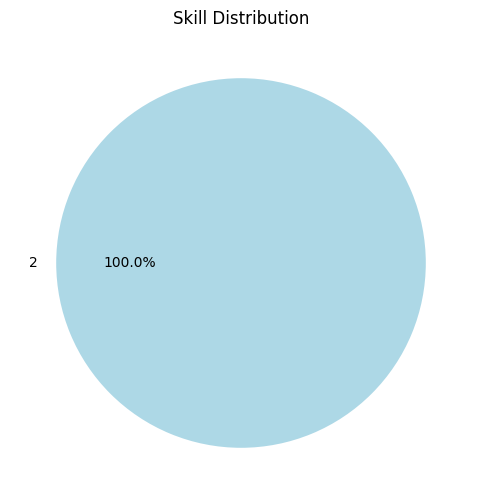

In [37]:
# 3. Skill Distribution
plt.figure(figsize=(8, 6))
df_constrained['skill'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Skill Distribution')
plt.ylabel('')
plt.show()

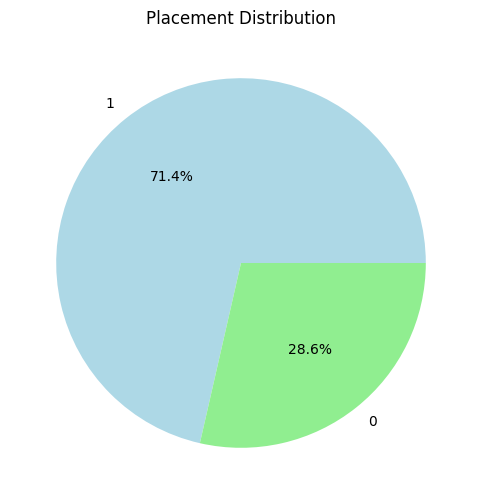

In [38]:
# 4. Placement Distribution
plt.figure(figsize=(8, 6))
df_constrained['placement'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Placement Distribution')
plt.ylabel('')
plt.show()

<Figure size 1000x800 with 0 Axes>

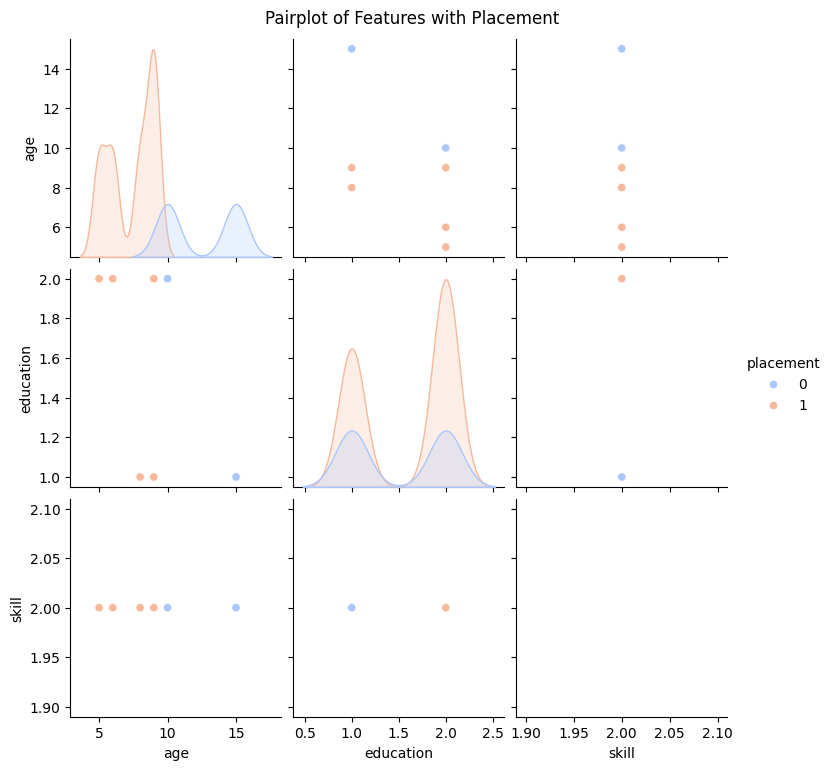

In [39]:
# 5. Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df_constrained, hue='placement', palette='coolwarm')
plt.suptitle('Pairplot of Features with Placement', y=1.02)
plt.show()

Individual Data Point Predictions:


NameError: name 'X_test' is not defined